```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
# gpu
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import requests

# Optional: ImageNet Labels

In [ ]:

LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
response = requests.get(LABELS_URL)
labels = response.text.split('\n')[1:-1]
for index in range(100, 250):
    print(f"Label for index {index} is {labels[index]}")


# Diagram

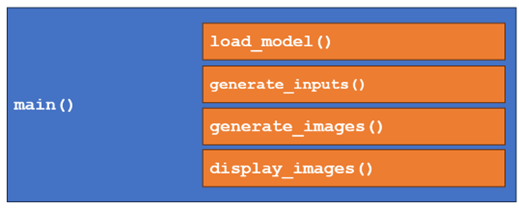

# Code

In [ ]:
def load_model():
    return hub.Module('https://tfhub.dev/deepmind/biggan-deep-128/1')

In [ ]:
def generate_inputs(batch_size=4, truncation=0.5):
    z = truncation * tf.random.truncated_normal([batch_size, 128])
    y_index = tf.constant([105] * batch_size)
    y = tf.one_hot(y_index, 1000)
    return y, z

In [ ]:
def generate_images(module, y, z, truncation=0.5):
    inputs = dict(y=y, z=z, truncation=truncation)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        images = sess.run(module(inputs))
    return images

In [ ]:
def display_images(images, batch_size=4):
    plt.figure(figsize=(15, 15))
    for i, image in enumerate(images):
        plt.subplot(1, batch_size, i + 1)
        plt.imshow((image + 1) / 2.0)
        plt.axis('off')
    plt.show()


In [ ]:
def main():
    module = load_model()
    y, z = generate_inputs()
    images = generate_images(module, y, z)
    display_images(images)

# Execution

In [ ]:
main()